# Extract Data From Kaggle & Install SoX

In [ ]:
!apt -qq install -y sox

The following additional packages will be installed:
  libmagic-mgc libmagic1 libopencore-amrnb0 libopencore-amrwb0 libsox-fmt-alsa
  libsox-fmt-base libsox3
Suggested packages:
  file libsox-fmt-all
The following NEW packages will be installed:
  libmagic-mgc libmagic1 libopencore-amrnb0 libopencore-amrwb0 libsox-fmt-alsa
  libsox-fmt-base libsox3 sox
0 upgraded, 8 newly installed, 0 to remove and 30 not upgraded.
Need to get 760 kB of archives.
After this operation, 6,717 kB of additional disk space will be used.
Selecting previously unselected package libopencore-amrnb0:amd64.
(Reading database ... 160980 files and directories currently installed.)
Preparing to unpack .../0-libopencore-amrnb0_0.1.3-2.1_amd64.deb ...
Unpacking libopencore-amrnb0:amd64 (0.1.3-2.1) ...
Selecting previously unselected package libopencore-amrwb0:amd64.
Preparing to unpack .../1-libopencore-amrwb0_0.1.3-2.1_amd64.deb ...
Unpacking libopencore-amrwb0:amd64 (0.1.3-2.1) ...
Selecting previously unselected pa

In [ ]:
!pip install sox

In [ ]:
#!pip install pysox

In [ ]:
#!git clone https://github.com/rabitt/pysox.git

In [ ]:
#!apt-get install -y python-setuptools 

In [ ]:
"""
%cd "/content/pysox"
!ls
!python setup.py build
!python setup.py install
"""

'\n%cd "/content/pysox"\n!ls\n!python setup.py build\n!python setup.py install\n'

In [ ]:
#audio = pysox.CSoxStream('test.wav')

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
!pwd

/content


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [ ]:
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              221KB  2021-03-28 09:42:48           1129  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-02-17 16:10:44            844  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-02-18 10:08:27            732  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19            322  
alsgroup/end-als                                            End ALS Kaggle C

In [ ]:
!kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio  

 96% 414M/429M [00:03<00:00, 133MB/s]
100% 429M/429M [00:03<00:00, 124MB/s]


In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  ravdess-emotional-speech-audio.zip
  inflating: Actor_01/03-01-01-01-01-01-01.wav  
  inflating: Actor_01/03-01-01-01-01-02-01.wav  
  inflating: Actor_01/03-01-01-01-02-01-01.wav  
  inflating: Actor_01/03-01-01-01-02-02-01.wav  
  inflating: Actor_01/03-01-02-01-01-01-01.wav  
  inflating: Actor_01/03-01-02-01-01-02-01.wav  
  inflating: Actor_01/03-01-02-01-02-01-01.wav  
  inflating: Actor_01/03-01-02-01-02-02-01.wav  
  inflating: Actor_01/03-01-02-02-01-01-01.wav  
  inflating: Actor_01/03-01-02-02-01-02-01.wav  
  inflating: Actor_01/03-01-02-02-02-01-01.wav  
  inflating: Actor_01/03-01-02-02-02-02-01.wav  
  inflating: Actor_01/03-01-03-01-01-01-01.wav  
  inflating: Actor_01/03-01-03-01-01-02-01.wav  
  inflating: Actor_01/03-01-03-01-02-01-01.wav  
  inflating: Actor_01/03-01-03-01-02-02-01.wav  
  inflating: Actor_01/03-01-03-02-01-01-01.wav  
  inflating: Actor_01/03-01-03-02-01-02-01.wav  
  inflating: Actor_01/03-01-03-02-02-01-01.wav  
  inflating: Actor_01/03

# Create new Files with Sox- Thanks to(!) Audacity some files cannot be read by scipy

In [ ]:
import librosa 
from librosa import display
import os
import pandas as pd
import glob
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!pip install spafe

     |████████████████████████████████| 81kB 8.2MB/s 


In [ ]:
import librosa 
from librosa import display
import os
import pandas as pd
import glob
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import sox
# create transformer
tfm = sox.Transformer()

In [ ]:
tfm.trim(0.5, 2.5)

In [ ]:
path = '/content/audio_speech_actors_01-24'

# Feature Extraction

In [ ]:
import scipy
from spafe.utils import vis

In [ ]:
from spafe.features.lfcc import lfcc
import scipy.io.wavfile

from spafe.features.lpc import lpc, lpcc, lpc2cep

from spafe.features.rplp import plp, rastaplp

In [ ]:
#import warnings
#warnings.filterwarnings("error")

# commented code


lst_spectogram_X = []
lst_spectogram_mfcc = []
lst_lfcc_X = []
lst_lpc_X = []
lst_plp_X = []
lst_plp_rasta_X = []
lst_y = []
counter = 0

for subdir, dirs, files in sorted(os.walk(path)):

  for file in files:
    lst_y.append(file[6:8])

    X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
    freq_spect = np.abs(librosa.stft(X, n_fft=1024, window='hamming', win_length=256, hop_length=128)) ** 2
    mel_spect = librosa.feature.melspectrogram(S=freq_spect, sr=44100, n_mels=128, fmax=8000)
    log_mel_spectogram=np.mean(librosa.power_to_db(mel_spect).T, axis=0)
    lst_spectogram_X.append(log_mel_spectogram)

    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    lst_spectogram_mfcc.append(mfccs)
    
    try:
      fs, sig = scipy.io.wavfile.read(os.path.join(subdir,file))

      lfccs = np.mean(lfcc(sig=sig,fs=fs,num_ceps=26), axis=0)
      lst_lfcc_X.append(lfccs)

      lpccs = np.mean(lpcc(sig=sig,fs=fs,num_ceps=26,do_rasta=False),axis=0)
      lst_lpc_X.append(lpccs)

      plps  = np.mean(plp(sig, fs=fs, num_ceps= 26), axis=0)
      lst_plp_X.append(plps)

      rasta_plps  = np.mean(rastaplp(sig, fs=fs, modelorder= 25), axis=0)
      lst_plp_rasta_X.append(rasta_plps)

    except UserWarning: #scipy dosyayı okuyamıyor
      counter = counter + 1 
      new_file = file.replace('.wav','') + "_new" + ".wav"
      tfm.build(os.path.join(subdir,file), os.path.join(subdir,new_file))
      fs, sig = scipy.io.wavfile.read(os.path.join(subdir,new_file))

      lfccs = np.mean(lfcc(sig=sig,fs=fs,num_ceps=26), axis=0)
      lst_lfcc_X.append(lfccs)

      lpccs = np.mean(lpcc(sig=sig,fs=fs,num_ceps=26,do_rasta=False),axis=0)
      lst_lpc_X.append(lpccs)

      plps  = np.mean(plp(sig, fs=fs, num_ceps= 26), axis=0)
      lst_plp_X.append(plps)  

      rasta_plps  = np.mean(rastaplp(sig, fs=fs, modelorder= 25), axis=0)
      lst_plp_rasta_X.append(rasta_plps)
      continue

In [ ]:
i = 1
for subdir, dirs, files in os.walk(path):
  for file in files:
    if i >= 3:
      break
    print(file.replace(".wav", "") + "_new.wav")
    print(i)
    i += 1
    

# Scipy icin dosyaları sox ile oku yeni dosyadan feature geçir 

In [ ]:
lst_spectogram_X = []
lst_spectogram_mfcc = []
lst_lfcc_X = []
lst_lpc_X = []
lst_plp_X = []
lst_plp_rasta_X = []
lst_y = []

for subdir, dirs, files in os.walk(path):
  for file in files:      
    lst_y.append(file[6:8])

    X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
    #freq_spect = np.abs(librosa.stft(X, n_fft=1024, window='hamming', win_length=256, hop_length=128)) ** 2
    mel_spect = librosa.feature.melspectrogram(y=X, sr=44100, n_mels=256)
    log_mel_spectogram=np.mean(librosa.power_to_db(mel_spect).T, axis=0)
    lst_spectogram_X.append(log_mel_spectogram)

    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    lst_spectogram_mfcc.append(mfccs)
    
    new_file = file.replace(".wav", "") + "_new.wav"
    tfm.build(os.path.join(subdir,file), os.path.join(subdir,new_file))
    fs, sig = scipy.io.wavfile.read(os.path.join(subdir,new_file))

    lfccs = np.mean(lfcc(sig=sig,fs=fs,num_ceps=26), axis=0)
    lst_lfcc_X.append(lfccs)

    lpccs = np.mean(lpcc(sig=sig,fs=fs,num_ceps=26,do_rasta=False),axis=0)
    lst_lpc_X.append(lpccs)

    plps  = np.mean(plp(sig, fs=fs, num_ceps= 26), axis=0)
    lst_plp_X.append(plps)

    rasta_plps  = np.mean(rastaplp(sig, fs=fs, modelorder= 25), axis=0)
    lst_plp_rasta_X.append(rasta_plps)

In [ ]:
np.array(lst_plp_rasta_X).shape

(1440, 26)

In [ ]:
np.array(lst_plp_X).shape

(1440, 26)

In [ ]:
np.array(lst_spectogram_mfcc).shape

(1440, 40)

In [ ]:
pd.DataFrame(lst_spectogram_X)

0          1          2    ...        253        254        255
0    -50.454372 -51.270660 -56.065350  ... -83.961685 -83.961685 -83.961685
1    -49.491085 -50.221817 -52.800274  ... -67.299255 -67.299255 -67.299255
2    -53.969833 -54.818539 -58.142551  ... -65.064880 -65.064880 -65.064880
3    -34.750984 -36.155037 -41.940868  ... -48.271946 -48.271946 -48.271946
4    -57.854771 -57.480083 -57.320766  ... -82.360367 -82.360367 -82.360367
...         ...        ...        ...  ...        ...        ...        ...
1435 -45.776100 -45.224995 -46.489960  ... -70.837296 -70.837296 -70.837296
1436 -41.639057 -41.778725 -44.910919  ... -66.199280 -66.199280 -66.199280
1437 -45.284985 -45.370682 -48.621464  ... -79.670753 -79.670753 -79.670753
1438 -25.064596 -25.825056 -30.842489  ... -53.878178 -53.878178 -53.878178
1439 -39.989326 -40.210678 -43.918404  ... -75.352173 -75.352173 -75.352173

[1440 rows x 256 columns]

In [ ]:
np.asarray(lst_spectogram_X).shape

(1440, 256)

In [ ]:
np.array(lst_lfcc_X).shape

(1440, 26)

In [ ]:
np.array(lst_lpc_X).shape

(1440, 26)

In [ ]:
X_mel = np.asarray(lst_spectogram_X)

X_lfcc = np.array(lst_lfcc_X)

X_plp = np.array(lst_plp_X)

X_plp_rasta = np.array(lst_plp_rasta_X)

X_lpc = np.array(lst_lpc_X)
X_mfcc = np.array(lst_spectogram_mfcc)

In [ ]:
X_all = np.hstack([X_mel, X_mfcc, X_lfcc, X_lpc, X_plp, X_plp_rasta])

In [ ]:
from keras.utils import np_utils
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [ ]:
lb = LabelEncoder()
y_new = np_utils.to_categorical(lb.fit_transform(np.ravel(lst_y)))

In [ ]:
y_new

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

# PCA FOR MEL

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
scaler = StandardScaler()
X_mel_scaled = scaler.fit_transform(X_mel)

In [ ]:
pca = PCA(n_components=128)
pca.fit(X_mel_scaled)
X_mel_pca = pca.transform(X_mel_scaled)

In [ ]:
pca.explained_variance_ratio_

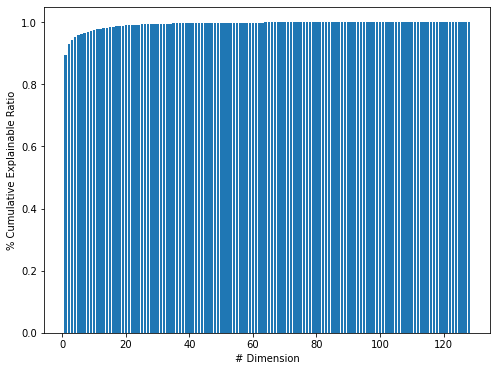

In [ ]:
cum_exp_var = []
var_exp = 0
for i in pca.explained_variance_ratio_:
    var_exp += i
    cum_exp_var.append(var_exp)

# Plot cumulative explained variance for all PCs

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(range(1,129), cum_exp_var)
ax.set_xlabel('# Dimension')
ax.set_ylabel('% Cumulative Explainable Ratio');

In [ ]:
X_mel_scaled = scaler.fit_transform(X_mel)
pca = PCA(n_components=10)
pca.fit(X_mel_scaled)
X_mel_pca = pca.transform(X_mel_scaled)

# PCA FOR ALL FEATURES

In [ ]:
X_all.shape[1]

272

In [ ]:
X_all_scaled = scaler.fit_transform(X_all)
pca = PCA(n_components=X_all.shape[1])
pca.fit(X_all_scaled)
X_all_pca = pca.transform(X_all_scaled)

In [ ]:
X_all.shape[1]

400

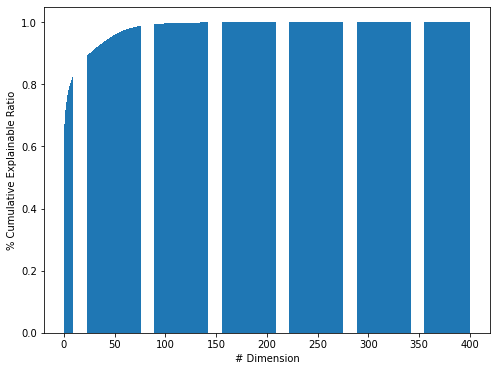

In [ ]:
cum_exp_var = []
var_exp = 0
for i in pca.explained_variance_ratio_:
    var_exp += i
    cum_exp_var.append(var_exp)

# Plot cumulative explained variance for all PCs

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(range(1,401), cum_exp_var)
ax.set_xlabel('# Dimension')
ax.set_ylabel('% Cumulative Explainable Ratio');

In [ ]:
X_all_scaled = scaler.fit_transform(X_all)
pca = PCA(n_components=50)
pca.fit(X_all_scaled)
X_all_pca = pca.transform(X_all_scaled)

# TRAIN TEST SPLIT

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_mel_pca.shape

(1440, 10)

In [ ]:
X_train_mfcc, X_test_mfcc, y_train_mfcc, y_test_mfcc = train_test_split(X_mfcc, y_new, test_size=0.2, random_state=5)
X_train_lfcc, X_test_lfcc, y_train_lfcc, y_test_lfcc = train_test_split(X_lfcc, y_new, test_size=0.2, random_state=5)
X_train_lpc, X_test_lpc, y_train_lpc, y_test_lpc = train_test_split(X_lpc, y_new, test_size=0.2, random_state=5)
X_train_mel, X_test_mel, y_train_mel, y_test_mel = train_test_split(X_mel, y_new, test_size=0.2, random_state=5)
X_train_plp, X_test_plp, y_train_plp, y_test_plp = train_test_split(X_plp, y_new, test_size=0.2, random_state=5)
X_train_plp_rasta, X_test_plp_rasta, y_train_plp_rasta, y_test_plp_rasta = train_test_split(X_plp_rasta, y_new, test_size=0.2, random_state=5)

In [ ]:
X_train_mel_pca, X_test_mel_pca, y_train_mel_pca, y_test_mel_pca = train_test_split(X_mel_pca, y_new, test_size=0.2, random_state=5)

In [ ]:
X_train_all_pca, X_test_all_pca, y_train_all_pca, y_test_all_pca = train_test_split(X_all_pca, y_new, test_size=0.2, random_state=5)

In [ ]:
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_new, test_size=0.2, random_state=5)

# Model Oluşturulması

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 80, 100, 200]
n_hidden = [1,2,3,4]
n_neurons = [50,100,150,200,250]
optimizer = ['RMSprop','Adam','SGD']

In [ ]:
param_distribs = dict(n_hidden=n_hidden, n_neurons=n_neurons, optimizer=optimizer)

In [ ]:
param_distribs = dict(n_hidden=n_hidden, n_neurons=n_neurons, optimizer=optimizer, epochs=epochs)

# **MFCC 40**

In [ ]:
# TODO: GRID SEARCH ile best parametre 
def build_model(n_hidden=1,n_neurons=50,optimizer='RMSprop'):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=X_train_mfcc.shape[1:]))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons,activation='relu'))
        #model.add(keras.layers.Dropout(rate=0.2))
    model.add(keras.layers.Dense(8,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    return model

In [ ]:
keras_model = keras.wrappers.scikit_learn.KerasClassifier(build_model)


In [ ]:
rcv = RandomizedSearchCV(keras_model,param_distribs,cv=4)

In [ ]:
rcv.fit(X_train_mfcc,y_train_mfcc,epochs=10)

Epoch 1/10
27/27 [==============================] - 0s 2ms/step - loss: 222.0757 - accuracy: 0.1171
Epoch 2/10
27/27 [==============================] - 0s 2ms/step - loss: 2.0778 - accuracy: 0.1360
Epoch 3/10
27/27 [==============================] - 0s 2ms/step - loss: 2.0756 - accuracy: 0.1454
Epoch 4/10
27/27 [==============================] - 0s 2ms/step - loss: 2.0760 - accuracy: 0.1492
Epoch 5/10
27/27 [==============================] - 0s 2ms/step - loss: 2.0760 - accuracy: 0.1196
Epoch 6/10
27/27 [==============================] - 0s 2ms/step - loss: 2.0757 - accuracy: 0.1204
Epoch 7/10
27/27 [==============================] - 0s 2ms/step - loss: 2.0741 - accuracy: 0.1268
Epoch 8/10
27/27 [==============================] - 0s 2ms/step - loss: 2.0743 - accuracy: 0.1192
Epoch 9/10
27/27 [==============================] - 0s 2ms/step - loss: 2.0735 - accuracy: 0.1234
Epoch 10/10
9/9 [==============================] - 0s 2ms/step - loss: 2.0696 - accuracy: 0.1285
Epoch 1/10
27/27 [=

RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fb7cc14b290>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'n_hidden': [1, 2, 3, 4],
                                        'n_neurons': [50, 100, 150, 200, 250],
                                        'optimizer': ['RMSprop', 'Adam',
                                                      'SGD']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [ ]:
print(rcv.best_params_)
print(rcv.best_score_)

{'optimizer': 'Adam', 'n_neurons': 150, 'n_hidden': 3}
0.3437499925494194


In [ ]:
rcv = RandomizedSearchCV(keras_model,param_distribs,cv=4)

In [ ]:
rcv.fit(X_train_mfcc,y_train_mfcc,epochs=80)

Görüntülenen çıkış son 5000 satıra kısaltıldı.
27/27 [==============================] - 0s 2ms/step - loss: 2.0614 - accuracy: 0.1267
Epoch 77/80
27/27 [==============================] - 0s 2ms/step - loss: 2.0549 - accuracy: 0.1552
Epoch 78/80
27/27 [==============================] - 0s 2ms/step - loss: 2.0652 - accuracy: 0.1363
Epoch 79/80
27/27 [==============================] - 0s 2ms/step - loss: 2.0671 - accuracy: 0.1313
Epoch 80/80
9/9 [==============================] - 0s 3ms/step - loss: 2.0679 - accuracy: 0.1181
Epoch 1/80
27/27 [==============================] - 0s 2ms/step - loss: 93.1388 - accuracy: 0.1373
Epoch 2/80
27/27 [==============================] - 0s 2ms/step - loss: 2.0668 - accuracy: 0.1261
Epoch 3/80
27/27 [==============================] - 0s 2ms/step - loss: 2.0685 - accuracy: 0.1300
Epoch 4/80
27/27 [==============================] - 0s 2ms/step - loss: 2.0703 - accuracy: 0.1293
Epoch 5/80
27/27 [==============================] - 0s 2ms/step - loss: 2.0700 

RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fb7cc14b290>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'n_hidden': [1, 2, 3, 4],
                                        'n_neurons': [50, 100, 150, 200, 250],
                                        'optimizer': ['RMSprop', 'Adam',
                                                      'SGD']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [ ]:
print(rcv.best_params_)
print(rcv.best_score_)

{'optimizer': 'RMSprop', 'n_neurons': 200, 'n_hidden': 2}
0.5737847238779068


# LPC MODEL

In [ ]:
# TODO: GRID SEARCH ile best parametre 
def build_model_lpc(n_hidden=1,n_neurons=50,optimizer='RMSprop'):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=X_train_lpc.shape[1:]))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons,activation='relu'))
        #model.add(keras.layers.Dropout(rate=0.2))
    model.add(keras.layers.Dense(8,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    return model

In [ ]:
keras_model = keras.wrappers.scikit_learn.KerasClassifier(build_model_lpc)
rcv = RandomizedSearchCV(keras_model,param_distribs, cv=4)
rcv.fit(X_train_lpc,y_train_lpc, epochs=10)

36/36 [==============================] - 0s 2ms/step - loss: 2.0865 - accuracy: 0.1189


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fb7bb5c1a10>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'n_hidden': [1, 2, 3, 4],
                                        'n_neurons': [50, 100, 150, 200, 250],
                                        'optimizer': ['RMSprop', 'Adam',
                                                      'SGD']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [ ]:
print(rcv.best_params_)
print(rcv.best_score_)

{'optimizer': 'RMSprop', 'n_neurons': 150, 'n_hidden': 1}
0.13107638992369175


In [ ]:
rcv = RandomizedSearchCV(keras_model,param_distribs, cv=4)
rcv.fit(X_train_lpc,y_train_lpc, epochs=80)

Görüntülenen çıkış son 5000 satıra kısaltıldı.
27/27 [==============================] - 0s 2ms/step - loss: 2.0653 - accuracy: 0.1429
Epoch 77/80
27/27 [==============================] - 0s 2ms/step - loss: 2.0513 - accuracy: 0.1371
Epoch 78/80
27/27 [==============================] - 0s 2ms/step - loss: 2.0538 - accuracy: 0.1402
Epoch 79/80
27/27 [==============================] - 0s 2ms/step - loss: 2.0555 - accuracy: 0.1363
Epoch 80/80
9/9 [==============================] - 0s 3ms/step - loss: 2.0640 - accuracy: 0.1562
Epoch 1/80
27/27 [==============================] - 0s 3ms/step - loss: 2.0959 - accuracy: 0.1375
Epoch 2/80
27/27 [==============================] - 0s 3ms/step - loss: 2.0693 - accuracy: 0.1375
Epoch 3/80
27/27 [==============================] - 0s 3ms/step - loss: 2.0610 - accuracy: 0.1404
Epoch 4/80
27/27 [==============================] - 0s 3ms/step - loss: 2.0631 - accuracy: 0.1416
Epoch 5/80
27/27 [==============================] - 0s 2ms/step - loss: 2.0698 -

RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fb7bb5c1a10>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'n_hidden': [1, 2, 3, 4],
                                        'n_neurons': [50, 100, 150, 200, 250],
                                        'optimizer': ['RMSprop', 'Adam',
                                                      'SGD']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [ ]:
print(rcv.best_params_)
print(rcv.best_score_)

{'optimizer': 'Adam', 'n_neurons': 250, 'n_hidden': 3}
0.2812500074505806


# **LFCC model**

In [ ]:
# TODO: GRID SEARCH ile best parametre 
def build_model_lfcc(n_hidden=1,n_neurons=50,optimizer='RMSprop'):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=X_train_lfcc.shape[1:]))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons,activation='relu'))
        #model.add(keras.layers.Dropout(rate=0.2))
    model.add(keras.layers.Dense(8,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    return model

In [ ]:
keras_model = keras.wrappers.scikit_learn.KerasClassifier(build_model_lfcc)
rcv = RandomizedSearchCV(keras_model,param_distribs,cv=4)
rcv.fit(X_train_lfcc,y_train_lfcc, epochs=10)

Epoch 1/10
27/27 [==============================] - 1s 3ms/step - loss: 2.0788 - accuracy: 0.0864
Epoch 2/10
27/27 [==============================] - 0s 3ms/step - loss: 2.0686 - accuracy: 0.1390
Epoch 3/10
27/27 [==============================] - 0s 3ms/step - loss: 2.0595 - accuracy: 0.1120
Epoch 4/10
27/27 [==============================] - 0s 3ms/step - loss: 2.0699 - accuracy: 0.1169
Epoch 5/10
27/27 [==============================] - 0s 3ms/step - loss: 2.0743 - accuracy: 0.1282
Epoch 6/10
27/27 [==============================] - 0s 3ms/step - loss: 2.0698 - accuracy: 0.1366
Epoch 7/10
27/27 [==============================] - 0s 3ms/step - loss: 2.0596 - accuracy: 0.1392
Epoch 8/10
27/27 [==============================] - 0s 3ms/step - loss: 2.0659 - accuracy: 0.1477
Epoch 9/10
27/27 [==============================] - 0s 3ms/step - loss: 2.0699 - accuracy: 0.1487
Epoch 10/10
9/9 [==============================] - 0s 3ms/step - loss: 2.0571 - accuracy: 0.1285
Epoch 1/10
27/27 [===

RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fb7cc12f610>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'n_hidden': [1, 2, 3, 4],
                                        'n_neurons': [50, 100, 150, 200, 250],
                                        'optimizer': ['RMSprop', 'Adam',
                                                      'SGD']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [ ]:
print(rcv.best_params_)
print(rcv.best_score_)

{'optimizer': 'SGD', 'n_neurons': 200, 'n_hidden': 2}
0.12673611380159855


In [ ]:
keras_model = keras.wrappers.scikit_learn.KerasClassifier(build_model_lfcc)
rcv = RandomizedSearchCV(keras_model,param_distribs,cv=4)
rcv.fit(X_train_lfcc,y_train_lfcc, epochs=80)

Görüntülenen çıkış son 5000 satıra kısaltıldı.
27/27 [==============================] - 0s 2ms/step - loss: 2.0599 - accuracy: 0.1491
Epoch 77/80
27/27 [==============================] - 0s 3ms/step - loss: 2.0531 - accuracy: 0.1226
Epoch 78/80
27/27 [==============================] - 0s 2ms/step - loss: 2.0638 - accuracy: 0.1580
Epoch 79/80
27/27 [==============================] - 0s 2ms/step - loss: 2.0556 - accuracy: 0.1515
Epoch 80/80
9/9 [==============================] - 0s 3ms/step - loss: 2.0678 - accuracy: 0.1181
Epoch 1/80
27/27 [==============================] - 0s 2ms/step - loss: 2.0786 - accuracy: 0.1132
Epoch 2/80
27/27 [==============================] - 0s 3ms/step - loss: 2.0703 - accuracy: 0.1522
Epoch 3/80
27/27 [==============================] - 0s 3ms/step - loss: 2.0607 - accuracy: 0.1512
Epoch 4/80
27/27 [==============================] - 0s 3ms/step - loss: 2.0619 - accuracy: 0.1366
Epoch 5/80
27/27 [==============================] - 0s 2ms/step - loss: 2.0607 -

RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fb7a0a9ed50>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'n_hidden': [1, 2, 3, 4],
                                        'n_neurons': [50, 100, 150, 200, 250],
                                        'optimizer': ['RMSprop', 'Adam',
                                                      'SGD']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [ ]:
print(rcv.best_params_)
print(rcv.best_score_)

{'optimizer': 'Adam', 'n_neurons': 250, 'n_hidden': 2}
0.1171875


# **MEL SPECTROGRAM PCA model**

In [ ]:
# TODO: GRID SEARCH ile best parametre 
def build_model_mel_pca(n_hidden=1,n_neurons=50,optimizer='RMSprop'):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=X_train_mel_pca.shape[1:]))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons,activation='relu'))
        #model.add(keras.layers.Dropout(rate=0.2))
    model.add(keras.layers.Dense(8,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    return model

In [ ]:
keras_model = keras.wrappers.scikit_learn.KerasClassifier(build_model_mel_pca)
rcv = RandomizedSearchCV(keras_model,param_distribs)
rcv.fit(X_train_mel_pca,y_train_mel_pca)

Görüntülenen çıkış son 5000 satıra kısaltıldı.
Epoch 48/200
29/29 [==============================] - 0s 3ms/step - loss: 0.4851 - accuracy: 0.8445
Epoch 49/200
29/29 [==============================] - 0s 3ms/step - loss: 0.4631 - accuracy: 0.8624
Epoch 50/200
29/29 [==============================] - 0s 3ms/step - loss: 0.5007 - accuracy: 0.8378
Epoch 51/200
29/29 [==============================] - 0s 3ms/step - loss: 0.4552 - accuracy: 0.8605
Epoch 52/200
29/29 [==============================] - 0s 3ms/step - loss: 0.4597 - accuracy: 0.8537
Epoch 53/200
29/29 [==============================] - 0s 3ms/step - loss: 0.4210 - accuracy: 0.8610
Epoch 54/200
29/29 [==============================] - 0s 3ms/step - loss: 0.4331 - accuracy: 0.8716
Epoch 55/200
29/29 [==============================] - 0s 3ms/step - loss: 0.4275 - accuracy: 0.8714
Epoch 56/200
29/29 [==============================] - 0s 3ms/step - loss: 0.3829 - accuracy: 0.8912
Epoch 57/200
29/29 [==============================] -

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f58c6a63a90>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'epochs': [10, 80, 100, 200],
                                        'n_hidden': [1, 2, 3, 4],
                                        'n_neurons': [50, 100, 150, 200, 250],
                                        'optimizer': ['RMSprop', 'Adam',
                                                      'SGD']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [ ]:
print(rcv.best_params_)
print(rcv.best_score_)

{'optimizer': 'Adam', 'n_neurons': 200, 'n_hidden': 4, 'epochs': 80}
0.5720308780670166


In [ ]:
keras_model = keras.wrappers.scikit_learn.KerasClassifier(build_model_mel_pca)
rcv = RandomizedSearchCV(keras_model,param_distribs)
rcv.fit(X_train_mel_pca,y_train_mel_pca)

Görüntülenen çıkış son 5000 satıra kısaltıldı.
Epoch 166/200
29/29 [==============================] - 0s 3ms/step - loss: 0.7946 - accuracy: 0.7033
Epoch 167/200
29/29 [==============================] - 0s 3ms/step - loss: 0.8095 - accuracy: 0.7082
Epoch 168/200
29/29 [==============================] - 0s 3ms/step - loss: 0.7495 - accuracy: 0.7469
Epoch 169/200
29/29 [==============================] - 0s 3ms/step - loss: 0.8349 - accuracy: 0.6918
Epoch 170/200
29/29 [==============================] - 0s 3ms/step - loss: 0.8217 - accuracy: 0.7117
Epoch 171/200
29/29 [==============================] - 0s 3ms/step - loss: 0.7597 - accuracy: 0.7365
Epoch 172/200
29/29 [==============================] - 0s 3ms/step - loss: 0.7705 - accuracy: 0.7459
Epoch 173/200
29/29 [==============================] - 0s 3ms/step - loss: 0.7640 - accuracy: 0.7308
Epoch 174/200
29/29 [==============================] - 0s 3ms/step - loss: 0.7880 - accuracy: 0.7210
Epoch 175/200
29/29 [=======================

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f58667ca210>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'epochs': [10, 80, 100, 200],
                                        'n_hidden': [1, 2, 3, 4],
                                        'n_neurons': [50, 100, 150, 200, 250],
                                        'optimizer': ['RMSprop', 'Adam',
                                                      'SGD']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [ ]:
print(rcv.best_params_)
print(rcv.best_score_)

{'optimizer': 'Adam', 'n_neurons': 100, 'n_hidden': 2, 'epochs': 100}
0.5399209380149841


# **MEL SPECTROGRAM non PCA model**

In [ ]:
# TODO: GRID SEARCH ile best parametre 
def build_model_mel_pca(n_hidden=1,n_neurons=50,optimizer='RMSprop'):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=X_train_mel.shape[1:]))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons,activation='relu'))
        #model.add(keras.layers.Dropout(rate=0.2))
    model.add(keras.layers.Dense(8,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    return model

In [ ]:
keras_model = keras.wrappers.scikit_learn.KerasClassifier(build_model_mel_pca)
rcv = RandomizedSearchCV(keras_model,param_distribs)
rcv.fit(X_train_mel,y_train_mel)

Görüntülenen çıkış son 5000 satıra kısaltıldı.
29/29 [==============================] - 0s 4ms/step - loss: 1.9727 - accuracy: 0.2059
Epoch 51/100
29/29 [==============================] - 0s 4ms/step - loss: 2.0122 - accuracy: 0.2167
Epoch 52/100
29/29 [==============================] - 0s 3ms/step - loss: 1.9531 - accuracy: 0.2277
Epoch 53/100
29/29 [==============================] - 0s 3ms/step - loss: 2.0057 - accuracy: 0.2072
Epoch 54/100
29/29 [==============================] - 0s 3ms/step - loss: 1.9346 - accuracy: 0.2116
Epoch 55/100
29/29 [==============================] - 0s 3ms/step - loss: 1.9915 - accuracy: 0.1901
Epoch 56/100
29/29 [==============================] - 0s 3ms/step - loss: 1.9872 - accuracy: 0.2135
Epoch 57/100
29/29 [==============================] - 0s 3ms/step - loss: 1.9291 - accuracy: 0.2175
Epoch 58/100
29/29 [==============================] - 0s 3ms/step - loss: 1.9731 - accuracy: 0.2149
Epoch 59/100
29/29 [==============================] - 0s 3ms/step 

In [ ]:
print(rcv.best_params_)
print(rcv.best_score_)

{'optimizer': 'Adam', 'n_neurons': 250, 'n_hidden': 4, 'epochs': 200}
0.4158328652381897


In [ ]:
keras_model = keras.wrappers.scikit_learn.KerasClassifier(build_model_mel_pca)
rcv = RandomizedSearchCV(keras_model,param_distribs)
rcv.fit(X_train_mel,y_train_mel,epochs=80)

Görüntülenen çıkış son 5000 satıra kısaltıldı.
29/29 [==============================] - 0s 3ms/step - loss: 2.0640 - accuracy: 0.1420
Epoch 77/80
29/29 [==============================] - 0s 3ms/step - loss: 2.0591 - accuracy: 0.1477
Epoch 78/80
29/29 [==============================] - 0s 2ms/step - loss: 2.0588 - accuracy: 0.1266
Epoch 79/80
29/29 [==============================] - 0s 3ms/step - loss: 2.0636 - accuracy: 0.1376
Epoch 80/80
8/8 [==============================] - 0s 3ms/step - loss: 2.0737 - accuracy: 0.1261
Epoch 1/80
29/29 [==============================] - 0s 3ms/step - loss: 788.8239 - accuracy: 0.1485
Epoch 2/80
29/29 [==============================] - 0s 3ms/step - loss: 2.5709 - accuracy: 0.1131
Epoch 3/80
29/29 [==============================] - 0s 3ms/step - loss: 2.0777 - accuracy: 0.1258
Epoch 4/80
29/29 [==============================] - 0s 3ms/step - loss: 2.0756 - accuracy: 0.1263
Epoch 5/80
29/29 [==============================] - 0s 2ms/step - loss: 2.0768

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fb79f5afb50>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'n_hidden': [1, 2, 3, 4],
                                        'n_neurons': [50, 100, 150, 200, 250],
                                        'optimizer': ['RMSprop', 'Adam',
                                                      'SGD']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [ ]:
print(rcv.best_params_)
print(rcv.best_score_)

{'optimizer': 'Adam', 'n_neurons': 250, 'n_hidden': 2}
0.2647092014551163


# **PLP model**

In [ ]:
# TODO: GRID SEARCH ile best parametre 
def build_model_plp(n_hidden=1,n_neurons=50,optimizer='RMSprop'):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=X_train_plp.shape[1:]))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons,activation='relu'))
        #model.add(keras.layers.Dropout(rate=0.2))
    model.add(keras.layers.Dense(8,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    return model

In [ ]:
keras_model = keras.wrappers.scikit_learn.KerasClassifier(build_model_plp)
rcv = RandomizedSearchCV(keras_model,param_distribs)
rcv.fit(X_train_plp,y_train_plp,epochs=10)

Epoch 1/10
29/29 [==============================] - 1s 3ms/step - loss: 2.0751 - accuracy: 0.1268
Epoch 2/10
29/29 [==============================] - 0s 3ms/step - loss: 2.0517 - accuracy: 0.1376
Epoch 3/10
29/29 [==============================] - 0s 3ms/step - loss: 2.0059 - accuracy: 0.2131
Epoch 4/10
29/29 [==============================] - 0s 4ms/step - loss: 1.9111 - accuracy: 0.2404
Epoch 5/10
29/29 [==============================] - 0s 3ms/step - loss: 1.8184 - accuracy: 0.2280
Epoch 6/10
29/29 [==============================] - 0s 3ms/step - loss: 1.8299 - accuracy: 0.2616
Epoch 7/10
29/29 [==============================] - 0s 3ms/step - loss: 1.8021 - accuracy: 0.2706
Epoch 8/10
29/29 [==============================] - 0s 4ms/step - loss: 1.8151 - accuracy: 0.2671
Epoch 9/10
29/29 [==============================] - 0s 3ms/step - loss: 1.7722 - accuracy: 0.3071
Epoch 10/10
8/8 [==============================] - 0s 5ms/step - loss: 1.7315 - accuracy: 0.3420
Epoch 1/10
29/29 [===

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fb7bb412f50>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'n_hidden': [1, 2, 3, 4],
                                        'n_neurons': [50, 100, 150, 200, 250],
                                        'optimizer': ['RMSprop', 'Adam',
                                                      'SGD']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [ ]:
print(rcv.best_params_)
print(rcv.best_score_)

{'optimizer': 'Adam', 'n_neurons': 150, 'n_hidden': 4}
0.30034632086753843


In [ ]:
keras_model = keras.wrappers.scikit_learn.KerasClassifier(build_model_plp)
rcv = RandomizedSearchCV(keras_model,param_distribs)
rcv.fit(X_train_plp,y_train_plp,epochs=80)

Görüntülenen çıkış son 5000 satıra kısaltıldı.
29/29 [==============================] - 0s 3ms/step - loss: 1.7001 - accuracy: 0.3318
Epoch 77/80
29/29 [==============================] - 0s 3ms/step - loss: 1.6802 - accuracy: 0.3593
Epoch 78/80
29/29 [==============================] - 0s 3ms/step - loss: 1.6912 - accuracy: 0.3438
Epoch 79/80
29/29 [==============================] - 0s 3ms/step - loss: 1.7251 - accuracy: 0.3188
Epoch 80/80
8/8 [==============================] - 0s 3ms/step - loss: 1.7808 - accuracy: 0.3348
Epoch 1/80
29/29 [==============================] - 1s 3ms/step - loss: 2.0995 - accuracy: 0.1323
Epoch 2/80
29/29 [==============================] - 0s 3ms/step - loss: 2.0515 - accuracy: 0.1466
Epoch 3/80
29/29 [==============================] - 0s 3ms/step - loss: 2.0269 - accuracy: 0.2056
Epoch 4/80
29/29 [==============================] - 0s 3ms/step - loss: 2.0356 - accuracy: 0.1741
Epoch 5/80
29/29 [==============================] - 0s 3ms/step - loss: 2.0095 -

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fb7a0bdefd0>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'n_hidden': [1, 2, 3, 4],
                                        'n_neurons': [50, 100, 150, 200, 250],
                                        'optimizer': ['RMSprop', 'Adam',
                                                      'SGD']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [ ]:
print(rcv.best_params_)
print(rcv.best_score_)

{'optimizer': 'RMSprop', 'n_neurons': 250, 'n_hidden': 4}
0.427103328704834


# PLP RASTA

In [ ]:
# TODO: GRID SEARCH ile best parametre 
def build_model_plp_rasta(n_hidden=1,n_neurons=50,optimizer='RMSprop'):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=X_train_plp_rasta.shape[1:]))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons,activation='relu'))
        #model.add(keras.layers.Dropout(rate=0.2))
    model.add(keras.layers.Dense(8,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    return model

In [ ]:
keras_model = keras.wrappers.scikit_learn.KerasClassifier(build_model_plp_rasta)
rcv = RandomizedSearchCV(keras_model,param_distribs)
rcv.fit(X_train_plp_rasta,y_train_plp_rasta,epochs=10)

Epoch 1/10
29/29 [==============================] - 1s 3ms/step - loss: 2.0774 - accuracy: 0.1336
Epoch 2/10
29/29 [==============================] - 0s 3ms/step - loss: 2.0649 - accuracy: 0.1334
Epoch 3/10
29/29 [==============================] - 0s 3ms/step - loss: 2.0598 - accuracy: 0.1249
Epoch 4/10
29/29 [==============================] - 0s 3ms/step - loss: 2.0723 - accuracy: 0.1304
Epoch 5/10
29/29 [==============================] - 0s 4ms/step - loss: 2.0678 - accuracy: 0.1539
Epoch 6/10
29/29 [==============================] - 0s 3ms/step - loss: 2.0705 - accuracy: 0.1256
Epoch 7/10
29/29 [==============================] - 0s 3ms/step - loss: 2.0573 - accuracy: 0.1379
Epoch 8/10
29/29 [==============================] - 0s 4ms/step - loss: 2.0631 - accuracy: 0.1304
Epoch 9/10
29/29 [==============================] - 0s 4ms/step - loss: 2.0690 - accuracy: 0.1372
Epoch 10/10
8/8 [==============================] - 0s 3ms/step - loss: 2.0603 - accuracy: 0.1212
Epoch 1/10
29/29 [===

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fb7b60e5390>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'n_hidden': [1, 2, 3, 4],
                                        'n_neurons': [50, 100, 150, 200, 250],
                                        'optimizer': ['RMSprop', 'Adam',
                                                      'SGD']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [ ]:
print(rcv.best_params_)
print(rcv.best_score_)

{'optimizer': 'RMSprop', 'n_neurons': 250, 'n_hidden': 1}
0.13020139187574387


In [ ]:
keras_model = keras.wrappers.scikit_learn.KerasClassifier(build_model_plp)
rcv = RandomizedSearchCV(keras_model,param_distribs)
rcv.fit(X_train_plp_rasta,y_train_plp_rasta,epochs=80)

Görüntülenen çıkış son 5000 satıra kısaltıldı.
29/29 [==============================] - 0s 3ms/step - loss: 2.0532 - accuracy: 0.1889
Epoch 77/80
29/29 [==============================] - 0s 3ms/step - loss: 2.0626 - accuracy: 0.1631
Epoch 78/80
29/29 [==============================] - 0s 3ms/step - loss: 2.0582 - accuracy: 0.1705
Epoch 79/80
29/29 [==============================] - 0s 4ms/step - loss: 2.0458 - accuracy: 0.1787
Epoch 80/80
8/8 [==============================] - 0s 3ms/step - loss: 2.0567 - accuracy: 0.1261
Epoch 1/80
29/29 [==============================] - 0s 3ms/step - loss: 2.0788 - accuracy: 0.1334
Epoch 2/80
29/29 [==============================] - 0s 3ms/step - loss: 2.0778 - accuracy: 0.1299
Epoch 3/80
29/29 [==============================] - 0s 4ms/step - loss: 2.0757 - accuracy: 0.1331
Epoch 4/80
29/29 [==============================] - 0s 3ms/step - loss: 2.0742 - accuracy: 0.1254
Epoch 5/80
29/29 [==============================] - 0s 3ms/step - loss: 2.0711 -

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fb79e764dd0>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'n_hidden': [1, 2, 3, 4],
                                        'n_neurons': [50, 100, 150, 200, 250],
                                        'optimizer': ['RMSprop', 'Adam',
                                                      'SGD']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [ ]:
print(rcv.best_params_)
print(rcv.best_score_)

{'optimizer': 'Adam', 'n_neurons': 200, 'n_hidden': 2}
0.2473856568336487


# All Features Model

In [ ]:
# TODO: GRID SEARCH ile best parametre 
def build_model_all(n_hidden=1,n_neurons=50,optimizer='RMSprop'):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=X_train_all.shape[1:]))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons,activation='relu'))
        #model.add(keras.layers.Dropout(rate=0.2))
    model.add(keras.layers.Dense(8,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    return model

In [ ]:
keras_model = keras.wrappers.scikit_learn.KerasClassifier(build_model_all)
rcv = RandomizedSearchCV(keras_model,param_distribs)
rcv.fit(X_train_all,y_train_plp_rasta,epochs=10)

Epoch 1/10
29/29 [==============================] - 0s 2ms/step - loss: 3723.4879 - accuracy: 0.1251
Epoch 2/10
29/29 [==============================] - 0s 2ms/step - loss: 2.1500 - accuracy: 0.1165
Epoch 3/10
29/29 [==============================] - 0s 2ms/step - loss: 2.0805 - accuracy: 0.1169
Epoch 4/10
29/29 [==============================] - 0s 2ms/step - loss: 2.0748 - accuracy: 0.1208
Epoch 5/10
29/29 [==============================] - 0s 2ms/step - loss: 2.0696 - accuracy: 0.1573
Epoch 6/10
29/29 [==============================] - 0s 2ms/step - loss: 2.0681 - accuracy: 0.1282
Epoch 7/10
29/29 [==============================] - 0s 2ms/step - loss: 2.0699 - accuracy: 0.1308
Epoch 8/10
29/29 [==============================] - 0s 2ms/step - loss: 2.0736 - accuracy: 0.1311
Epoch 9/10
29/29 [==============================] - 0s 2ms/step - loss: 2.0711 - accuracy: 0.1265
Epoch 10/10
8/8 [==============================] - 0s 2ms/step - loss: 2.0653 - accuracy: 0.1212
Epoch 1/10
29/29 [

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fb7a00a3750>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'n_hidden': [1, 2, 3, 4],
                                        'n_neurons': [50, 100, 150, 200, 250],
                                        'optimizer': ['RMSprop', 'Adam',
                                                      'SGD']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [ ]:
print(rcv.best_params_)
print(rcv.best_score_)

{'optimizer': 'Adam', 'n_neurons': 150, 'n_hidden': 3}
0.34806700944900515


In [ ]:
keras_model = keras.wrappers.scikit_learn.KerasClassifier(build_model_all)
rcv = RandomizedSearchCV(keras_model,param_distribs)
rcv.fit(X_train_all,y_train_all,epochs=80)

Görüntülenen çıkış son 5000 satıra kısaltıldı.
29/29 [==============================] - 0s 3ms/step - loss: 1.7899 - accuracy: 0.3941
Epoch 77/80
29/29 [==============================] - 0s 3ms/step - loss: 1.6226 - accuracy: 0.4371
Epoch 78/80
29/29 [==============================] - 0s 3ms/step - loss: 1.5375 - accuracy: 0.4297
Epoch 79/80
29/29 [==============================] - 0s 3ms/step - loss: 1.6452 - accuracy: 0.3987
Epoch 80/80
8/8 [==============================] - 0s 4ms/step - loss: 1.8235 - accuracy: 0.3478
Epoch 1/80
29/29 [==============================] - 0s 3ms/step - loss: 8611.5933 - accuracy: 0.1234
Epoch 2/80
29/29 [==============================] - 0s 4ms/step - loss: 2.0784 - accuracy: 0.1339
Epoch 3/80
29/29 [==============================] - 0s 3ms/step - loss: 2.0777 - accuracy: 0.1185
Epoch 4/80
29/29 [==============================] - 0s 3ms/step - loss: 2.0761 - accuracy: 0.1430
Epoch 5/80
29/29 [==============================] - 0s 3ms/step - loss: 2.075

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fb7a055b050>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'n_hidden': [1, 2, 3, 4],
                                        'n_neurons': [50, 100, 150, 200, 250],
                                        'optimizer': ['RMSprop', 'Adam',
                                                      'SGD']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [ ]:
print(rcv.best_params_)
print(rcv.best_score_)

{'optimizer': 'Adam', 'n_neurons': 100, 'n_hidden': 2}
0.46177676916122434


# ALL FEATURES WITH PCA

In [ ]:
# TODO: GRID SEARCH ile best parametre 
def build_model_all_pca(n_hidden=1,n_neurons=50,optimizer='RMSprop'):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=X_train_all_pca.shape[1:]))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons,activation='relu'))
        #model.add(keras.layers.Dropout(rate=0.2))
    model.add(keras.layers.Dense(8,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    return model

In [ ]:
keras_model = keras.wrappers.scikit_learn.KerasClassifier(build_model_all_pca)
rcv = RandomizedSearchCV(keras_model,param_distribs)
rcv.fit(X_train_all_pca,y_train_all_pca,epochs=10)

Epoch 1/10
29/29 [==============================] - 1s 3ms/step - loss: 1.9609 - accuracy: 0.2298
Epoch 2/10
29/29 [==============================] - 0s 2ms/step - loss: 1.4880 - accuracy: 0.4720
Epoch 3/10
29/29 [==============================] - 0s 2ms/step - loss: 1.3104 - accuracy: 0.5186
Epoch 4/10
29/29 [==============================] - 0s 2ms/step - loss: 1.1151 - accuracy: 0.6175
Epoch 5/10
29/29 [==============================] - 0s 3ms/step - loss: 0.9816 - accuracy: 0.6614
Epoch 6/10
29/29 [==============================] - 0s 2ms/step - loss: 0.9347 - accuracy: 0.6861
Epoch 7/10
29/29 [==============================] - 0s 3ms/step - loss: 0.7716 - accuracy: 0.7326
Epoch 8/10
29/29 [==============================] - 0s 3ms/step - loss: 0.6573 - accuracy: 0.7815
Epoch 9/10
29/29 [==============================] - 0s 2ms/step - loss: 0.6200 - accuracy: 0.8008
Epoch 10/10
8/8 [==============================] - 0s 2ms/step - loss: 1.4243 - accuracy: 0.5325
Epoch 1/10
29/29 [===

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fb7a09ccbd0>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'n_hidden': [1, 2, 3, 4],
                                        'n_neurons': [50, 100, 150, 200, 250],
                                        'optimizer': ['RMSprop', 'Adam',
                                                      'SGD']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [ ]:
print(rcv.best_params_)
print(rcv.best_score_)

{'optimizer': 'Adam', 'n_neurons': 250, 'n_hidden': 3}
0.5077658474445343


In [ ]:
keras_model = keras.wrappers.scikit_learn.KerasClassifier(build_model_all_pca)
rcv = RandomizedSearchCV(keras_model,param_distribs)
rcv.fit(X_train_all_pca,y_train_all_pca,epochs=200)

Streaming output truncated to the last 5000 lines.
Epoch 107/200
29/29 [==============================] - 0s 3ms/step - loss: 8.1434e-04 - accuracy: 1.0000
Epoch 108/200
29/29 [==============================] - 0s 3ms/step - loss: 8.0974e-04 - accuracy: 1.0000
Epoch 109/200
29/29 [==============================] - 0s 3ms/step - loss: 7.7863e-04 - accuracy: 1.0000
Epoch 110/200
29/29 [==============================] - 0s 4ms/step - loss: 7.5814e-04 - accuracy: 1.0000
Epoch 111/200
29/29 [==============================] - 0s 3ms/step - loss: 7.3917e-04 - accuracy: 1.0000
Epoch 112/200
29/29 [==============================] - 0s 3ms/step - loss: 7.4720e-04 - accuracy: 1.0000
Epoch 113/200
29/29 [==============================] - 0s 3ms/step - loss: 7.7673e-04 - accuracy: 1.0000
Epoch 114/200
29/29 [==============================] - 0s 3ms/step - loss: 7.1670e-04 - accuracy: 1.0000
Epoch 115/200
29/29 [==============================] - 0s 4ms/step - loss: 6.8009e-04 - accuracy: 1.0000
Epoc

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fb7cc14afd0>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'n_hidden': [1, 2, 3, 4],
                                        'n_neurons': [50, 100, 150, 200, 250],
                                        'optimizer': ['RMSprop', 'Adam',
                                                      'SGD']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [ ]:
print(rcv.best_params_)
print(rcv.best_score_)

{'optimizer': 'Adam', 'n_neurons': 200, 'n_hidden': 4}
0.5338076412677765
